<a href="https://colab.research.google.com/github/suafle/obs_astrophysics/blob/master/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import imageio
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image

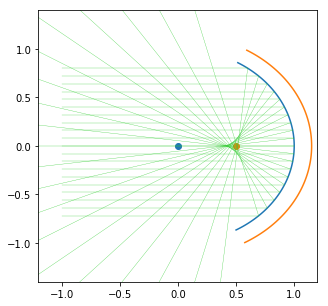

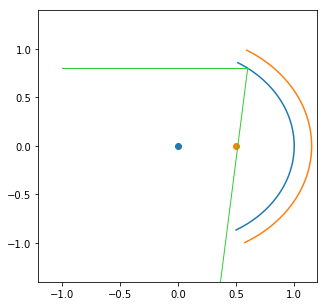

In [0]:
#Spheric mirror/reflexion
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 1.
x = r*np.cos(ii)
y = r*np.sin(ii)

delta = -0.04
dy = np.arange(0.80,-0.80,delta)
dx = np.sqrt(1- dy*dy)
tangentx = np.gradient(dx,2)
tangenty = np.gradient(dy,2)  

normalx = -np.abs(tangenty)/(np.sqrt(tangentx**2 + tangenty**2))
normaly = -normalx*(tangentx/tangenty)

incidentx = dx - (-1)
incidenty = dy - dy

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0])
plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([-1,dx[i]],[dy[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = (5,5)
rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0])
ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([-1,dx[i]],[dy[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=200)
HTML(anim.to_html5_video())
  

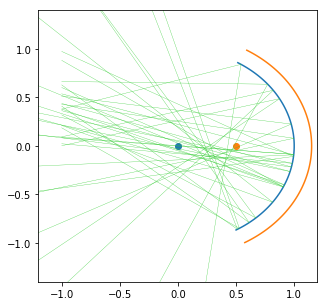

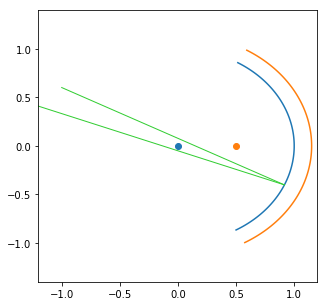

In [0]:
#Spheric random mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 1.
x = r*np.cos(ii)
y = r*np.sin(ii)


#random rays
x1 = -1.0*np.ones(40)
y1 = np.random.random(40)
x2 = 0.5*np.ones(40)
y2 = np.random.uniform(-np.sqrt(1. - 0.5**2),np.sqrt(1. - 0.5**2),40)

#Interction sphere and line (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n + np.sqrt(1. - n**2 + m**2))/(1. + m**2)
dy = m*dx + n
  
dx_minu = dx - 0.001
dx_plus = dx + 0.001
dy_minu = m*dx_minu + n
dy_plus = m*dx_plus + n

tangentx = dx_plus - dx_minu
tangenty = dy_plus - dy_minu
#alpha = np.arctan(tangentx/tangenty) #angle between tangent and incoming horizontal ray
#reflectedx = -np.cos(2.*alpha) - dx #refelcted ray
#reflectedy = np.sin(2.*alpha) - dy #refelcted ray

normalx = -dx/np.sqrt(dx**2 + dy**2)
normaly = -dy/np.sqrt(dx**2 + dy**2)

incidentx = dx - x1
incidenty = dy - y1

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly


plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0])
plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = (5,5)
rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0])
ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([x1[i],dx[i]],[y1[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=200)
HTML(anim.to_html5_video())
#anim.save('filename.mp4')

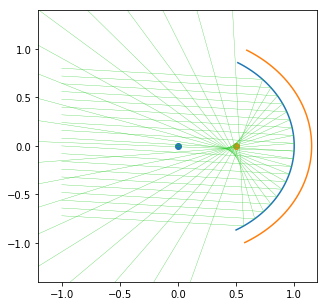

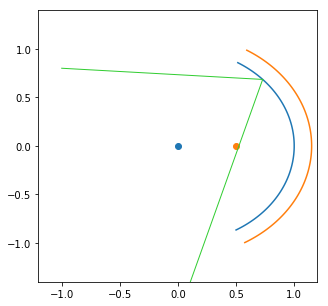

In [0]:
#Spheric mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 1.
x = r*np.cos(ii)
y = r*np.sin(ii)

#random rays
x1 = -1.0*np.ones(40)
y1 = np.arange(0.80,-0.80,-0.04)
x2 = 0.5*np.ones(40)
y2 = np.arange(0.70,-0.90,-0.04)

#Interction sphere and line (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n + np.sqrt(1. - n**2 + m**2))/(1. + m**2)
dy = m*dx + n
  
dx_minu = dx - 0.001
dx_plus = dx + 0.001
dy_minu = m*dx_minu + n
dy_plus = m*dx_plus + n

tangentx = dx_plus - dx_minu 
tangenty = dy_plus - dy_minu

#normalx = -np.abs(tangenty)/(np.sqrt(tangentx**2 + tangenty**2))
#normaly = -normalx*(tangentx/tangenty)

normalx = -dx/np.sqrt(dx**2 + dy**2)
normaly = -dy/np.sqrt(dx**2 + dy**2)

incidentx = dx - x1
incidenty = dy - y1

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0])
plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()


plt.rcParams["figure.figsize"] = (5,5)
rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0])
ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([x1[i],dx[i]],[y1[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=200)
HTML(anim.to_html5_video())
#anim.save('filename.mp4')
  

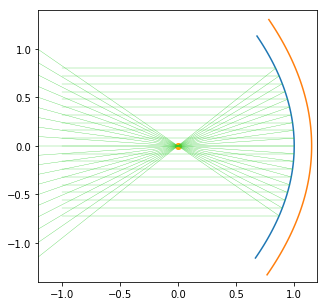

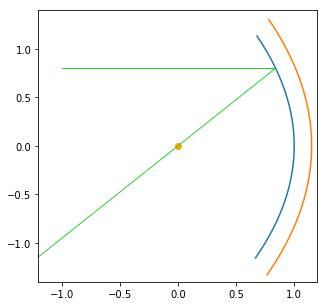

In [0]:
#Parabolic mirror
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)
#En cartesianas y**2 = -4*(x-1)

delta = -0.04
dy = np.arange(0.80,-0.80,delta)
angles = 2*np.arctan(dy/2)
dx = (2./(1 + np.cos(angles)))*np.cos(angles)

N = np.sqrt(dy**2 + 4) 
normalx = 2./N
normaly = dy/N

incidentx = dx - (-1)
incidenty = dy - dy

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0],c='orange')
#plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([-1,dx[i]],[dy[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()

plt.rcParams["figure.figsize"] = (5,5)
rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0],c='orange')
#ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([-1,dx[i]],[dy[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=200)
HTML(anim.to_html5_video())
#anim.save('filename.mp4')
  

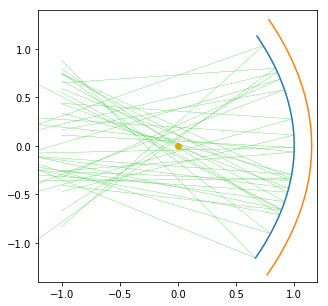

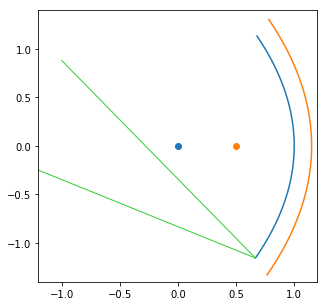

In [0]:
#Parabolic random mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)
#En cartesianas y**2 = -4*(x-1)

plt.rcParams["figure.figsize"] = (5,5)

#random rays
x1 = -1.0*np.ones(40)
y1 = np.random.uniform(-1,1,40)
x2 = 0.6*np.ones(40)
y2 = np.random.uniform(-1.15,1.15,40)
#y2 = np.random.uniform(-np.sqrt(2.4),np.sqrt(2.4),40)

#Interction sphere and parabola (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n - 2. + 2.*np.sqrt(m*n + 1. + m**2))/(m**2)
dy = m*dx + n

N = np.sqrt(dy**2 + 4) 
normalx = 2./N
normaly = dy/N

incidentx = dx - x1
incidenty = dy - y1

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0],c='orange')
#plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()

rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0])
ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([x1[i],dx[i]],[y1[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=200)
HTML(anim.to_html5_video())
#anim.save('filename.mp4')

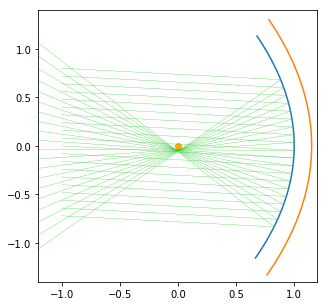

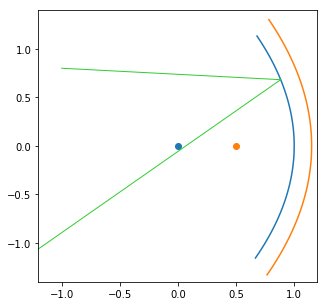

In [0]:
#Parabolic mirror off-axis
ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)
#En cartesianas y**2 = -4*(x-1)

plt.rcParams["figure.figsize"] = (5,5)

#random rays
x1 = -1.0*np.ones(40)
y1 = np.arange(0.8,-0.8,-0.04)
x2 = 0.6*np.ones(40)
y2 = np.arange(0.7,-0.9,-0.04)
#y2 = np.random.uniform(-np.sqrt(2.4),np.sqrt(2.4),40)

#Interction sphere and parabola (dx,dy)
m = (y2 - y1)/(x2 - x1)
n = y2 - m*x2

dx = (-m*n - 2. + 2.*np.sqrt(m*n + 1. + m**2))/(m**2)
dy = m*dx + n
  
N = np.sqrt(dy**2 + 4) 
normalx = 2./N
normaly = dy/N

incidentx = dx - x1
incidenty = dy - y1

reflectedx = incidentx - 2*(incidentx*normalx + incidenty*normaly)*normalx
reflectedy = incidenty - 2*(incidentx*normalx + incidenty*normaly)*normaly

plt.rcParams["figure.figsize"] = (5,5)
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)
plt.scatter([0],[0],c='orange')
#plt.scatter([0.5],[0])
plt.xlim([-1.2, 1.2])
plt.ylim([-1.4, 1.4])

for i in range(0,40,2):
  plt.plot([x1[i],dx[i]],[y1[i],dy[i]],color='limegreen',lw=0.3) #incident ray
  plt.plot([dx[i],reflectedx[i]],[dy[i],reflectedy[i]],color='limegreen',lw=0.3) #reflected ray
plt.show()
plt.close()

rc('animation', html='html5')
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter([0],[0])
ax.scatter([0.5],[0])
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.4, 1.4))
ax.plot(x,y, lw=1.5)
ax.plot(x*1.15,y*1.15, lw=1.5)

line1, = ax.plot([], [], lw=1, color = 'limegreen')
line2, = ax.plot([], [], lw=1, color = 'limegreen')

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
  line1.set_data([x1[i],dx[i]],[y1[i],dy[i]]) #incident ray
  line2.set_data([dx[i],reflectedx[i]],[dy[i],reflectedy[i]]) #reflected ray

anim = animation.FuncAnimation(fig, animate,frames=40,interval=100)
HTML(anim.to_html5_video())
#anim.save('filename.mp4')